# Visualizing and preparing data from the Titanic dataset.
### Author: Tiernan Lindauer

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import DataFrame
from sklearn.preprocessing import OrdinalEncoder

In [3]:
titanic_data: DataFrame = pd.read_csv("data/train.csv")
titanic_data.drop(labels=["PassengerId", "Name", "Cabin", "Ticket"], axis=1, inplace=True)

Translate `male` or `female` into either 1 or 0, respectively

In [4]:
ordinal_encoder = OrdinalEncoder()
sex_cat = titanic_data[["Sex"]]
sex_cat_encoded = ordinal_encoder.fit_transform(sex_cat)
titanic_data[["Sex"]] = sex_cat_encoded

Translate the `Embarked` status into categories

In [5]:
titanic_data = pd.get_dummies(titanic_data, columns=['Embarked'], prefix='Embarked')

In [36]:
def norm(data):
    return data / max(data)

Print how correlated each data entry is with all other data entries

In [87]:
titanic_data["Combo"] = titanic_data["Sex"] + norm(titanic_data["Pclass"]) - 0.1*norm(titanic_data["Fare"])
corr_matrix: DataFrame = titanic_data.corr()
print(corr_matrix["Survived"].sort_values(ascending=False))

Survived      1.000000
Fare          0.275122
Embarked_C    0.185123
Parch         0.094258
SibSp        -0.014598
Embarked_Q   -0.048673
Age          -0.079472
Embarked_S   -0.156367
Pclass       -0.354847
Sex          -0.541935
Combo        -0.606240
Name: Survived, dtype: float64


In [82]:
titanic_data.dropna(inplace=True)
titanic_data.head(8)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Combo
0,0,3,1.0,22.0,1,0,7.2500,0,0,1,1.944867
1,1,1,0.0,38.0,1,0,71.2833,1,0,0,-0.208745
2,1,3,0.0,26.0,0,0,7.9250,0,0,1,0.939734
3,1,1,0.0,35.0,1,0,53.1000,0,0,1,-0.070469
4,0,3,1.0,35.0,0,0,8.0500,0,0,1,1.938783
6,0,1,1.0,54.0,0,0,51.8625,0,0,1,0.938942
7,0,3,1.0,2.0,3,1,21.0750,0,0,1,1.839734
8,1,3,0.0,27.0,0,2,11.1333,0,0,1,0.915336


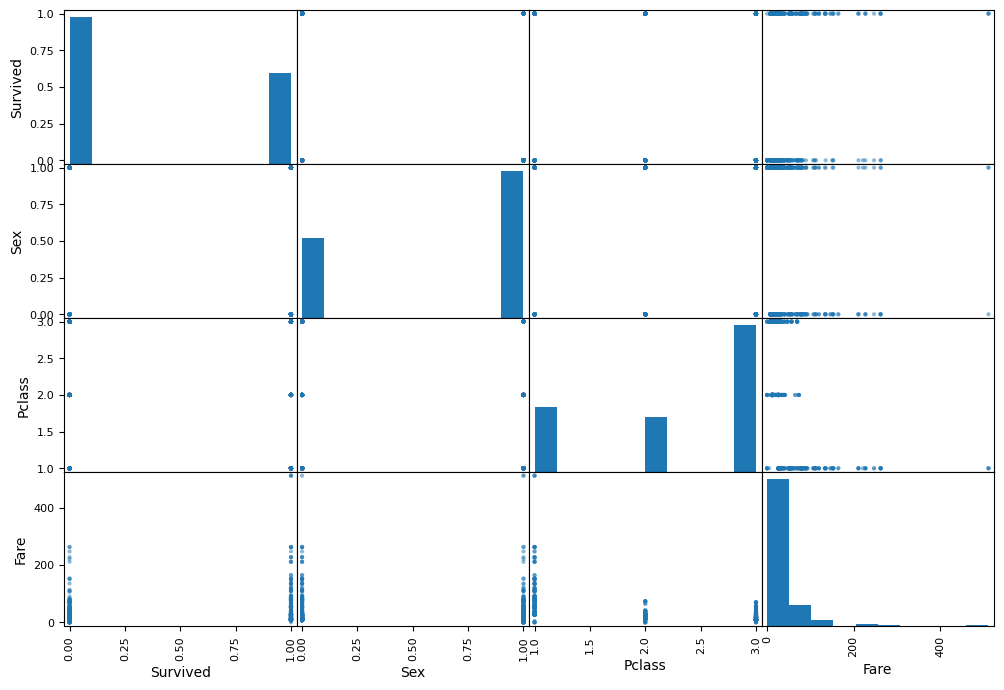

In [8]:
from pandas.plotting import scatter_matrix

attributes = ["Survived", "Sex", "Pclass",
              "Fare"]
scatter_matrix(titanic_data[attributes], figsize=(12, 8))
plt.show()